In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set()

We start off with two matrices A, B

In [3]:
A = np.array([[1,2,3,4],[2,4,6,8],[3,6,9,12],[4,8,12,16]])
B = np.array([[2,3,4,5],[3,4,5,6],[4,5,6,7],[5,6,7,8]])

Next we compute their sigular values. A plot of the singular values tells us that matrix A is of rank 1, while the rank of matrix B greater than two. Which means that matrix A can be summarized by the first singular vectors, `u` and `v`

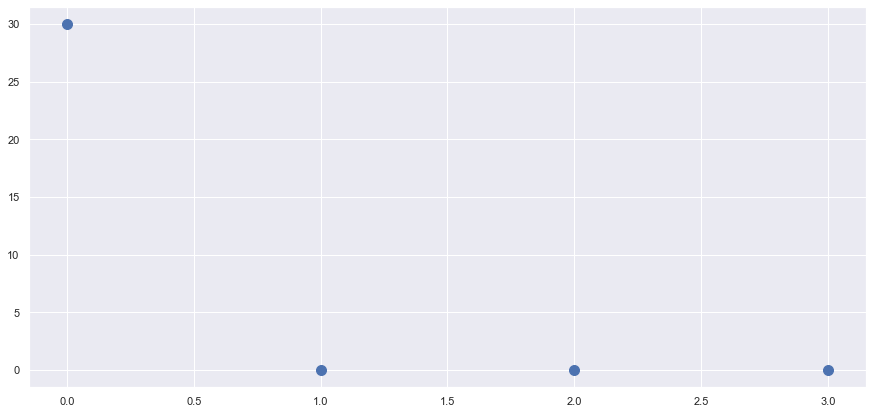

In [4]:
_,sing_A, _ = np.linalg.svd(A)

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(sorted(sing_A, reverse = True), 'bo', markersize = 10)

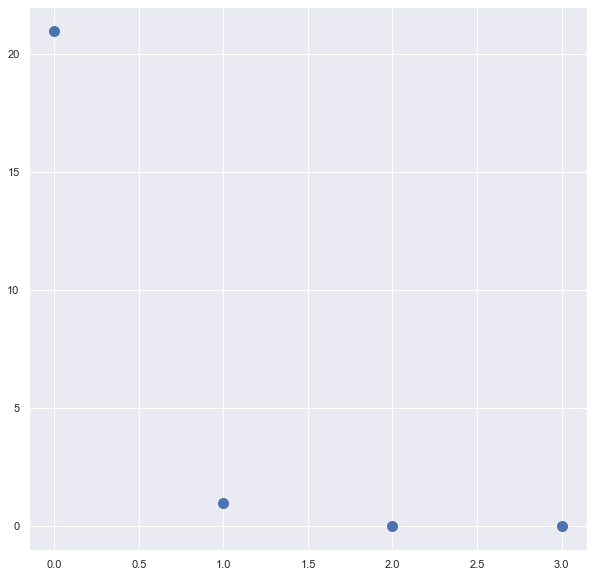

In [5]:
_, sing_B, _ = np.linalg.svd(B)

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(sorted(sing_B, reverse = True), 'bo',markersize = 10)

Next we consider a flag of matrix, C. This is a triangular matrix with 1 in the lower bottom and zeros on the upper half. This particular matrix has nonzero singular values and so it's actually full rank and thus may be difficult to summarize it. However we may choose to approximate it using the first two  components, `u_1`,`v_1` and `u_2`,`v_2` 

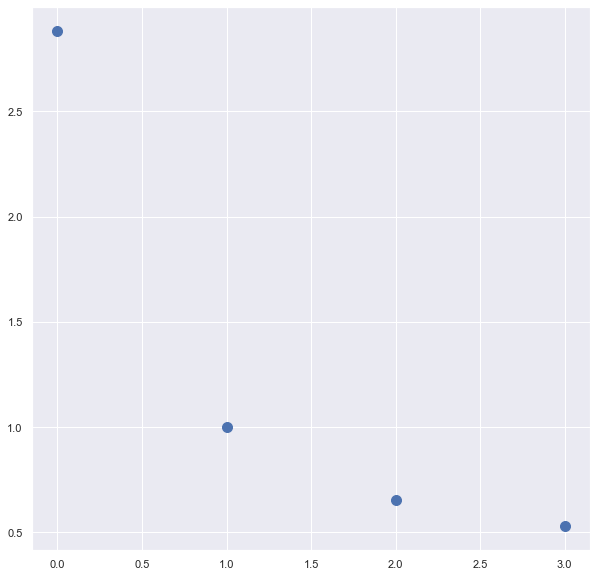

In [6]:
C = np.array([[1,0,0,0],[1,1,0,0],[1,1,1,0],[1,1,1,1]])
U, sing_C, V = np.linalg.svd(C)
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(sing_C, 'bo', markersize = 10);

This is image below is the image of the matrix C.

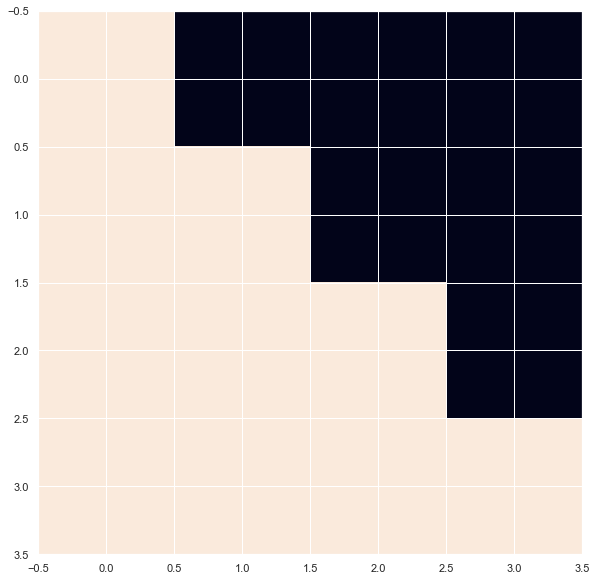

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(C, interpolation= 'nearest')

## Dimension reduction using PCA

We start of with 50 data points in the plane. Each of the variables `x` and `y` are demeaned. The idea here is to find the 1-D supspace to project the data onto. To do this, we first compute the left singular vectors. Next, we pick the first singular vector `u_1` and then project the data points onto it.

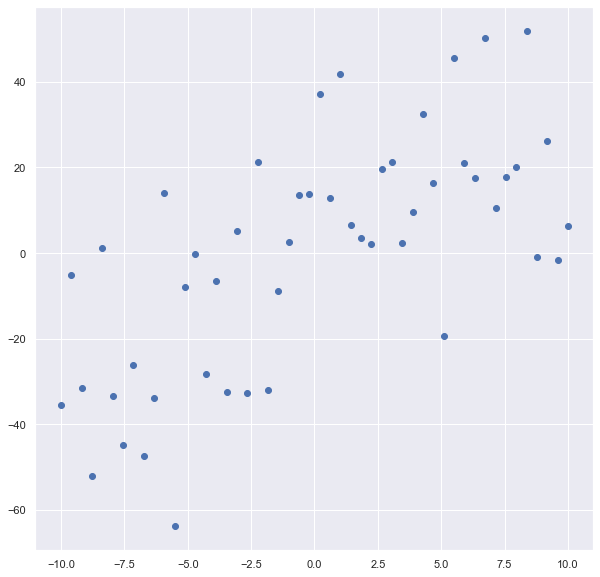

In [8]:
## Create data points
N = 50 # number of data points in R^2
x = np.linspace(-10,10, N)
y = 3*x + 2 + np.random.normal(scale = 20, size=(N,))
## Demean each variable
x0 = x - np.mean(x)
y0 = y - np.mean(y)
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(x0,y0);

In [9]:
A = np.c_[x0,y0]
X = A.T # our data set

In [10]:
X.shape # has two variables and fifty data points

(2, 50)

In [11]:
U, sig, V = np.linalg.svd(X) # Compute singular value decomposition of this data set

In [12]:
sig

array([194.58822416,  30.52868378])

In [13]:
U # left singular vectors in the columns

array([[-0.14742462, -0.98907329],
       [-0.98907329,  0.14742462]])

In the graph below, the red line is the line the direction of `u_1`. Along that direction, there variability of data is most maintained. The black points are the projections of the data on the subspace in the direction of `u_1`.

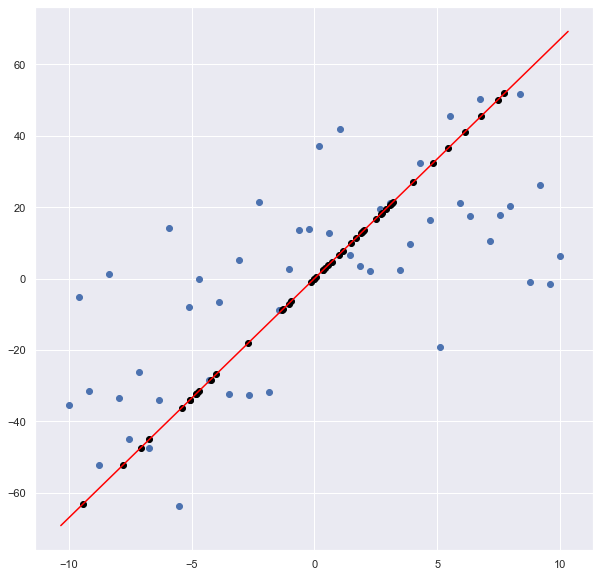

In [14]:
## Demeaned data points
x = np.linspace(-10,10, N)
y = 3*x + 2 + np.random.normal(scale = 20, size=(N,))
#---------------------------------------------------

# Line along the direction of u_1
t = np.linspace(-70,70, N)
linex = [i*U[:,0][0] for i in t]
liney = [i*U[:,0][1] for i in t]
#--------------------------------------

## projection on to the line along u_1
Proj_onto_U = np.outer(U[:, 0],U[:, 0])
X_onto_u1 = Proj_onto_U.dot(X)
#------------------------------------

fig, ax = plt.subplots(figsize = (10,10))

ax.scatter(x0,y0)
ax.plot(linex, liney, color = 'red')
ax.scatter(X_onto_u1[0,:], X_onto_u1[1,:], color = 'black')